## Mounting drive and importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IIT Assign

/content/drive/MyDrive/IIT Assign


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
batch_size = 32
img_height = 100
img_width = 100

In [ ]:
train_data_dir = 'train'
test_data_dir = 'valid'

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dest_folder,
  "inferred",  
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dest_folder,
  "inferred",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

In [ ]:
class_names = train_ds.class_names
print(class_names)

# **plots**

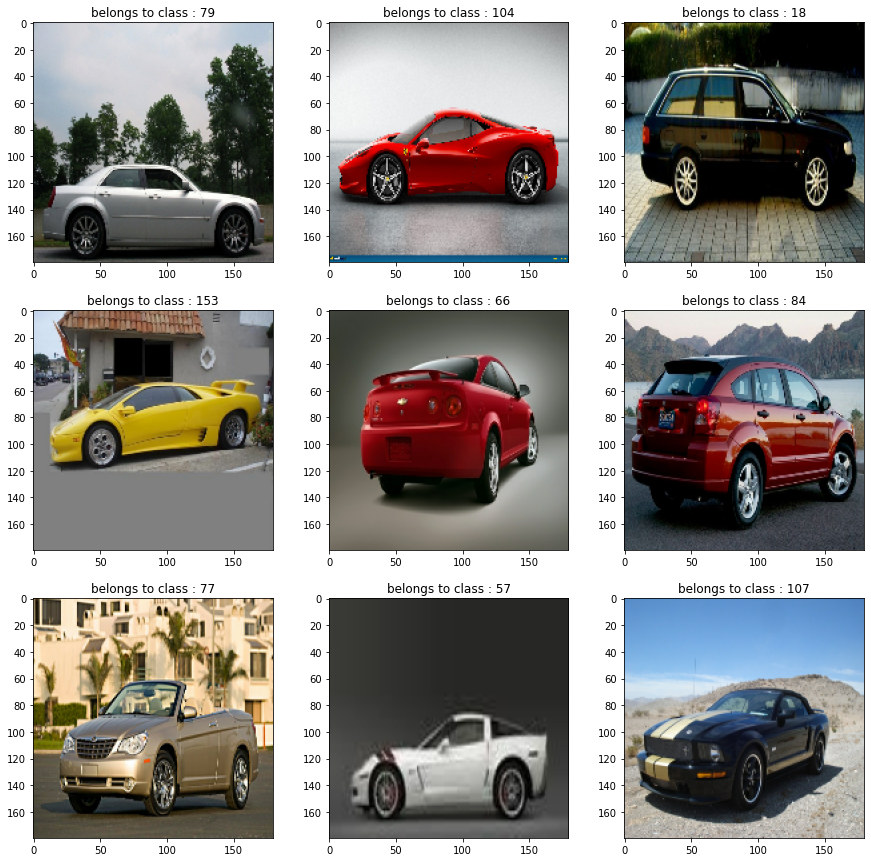

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f'belongs to class : {class_names[labels[i]]}')
        # plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


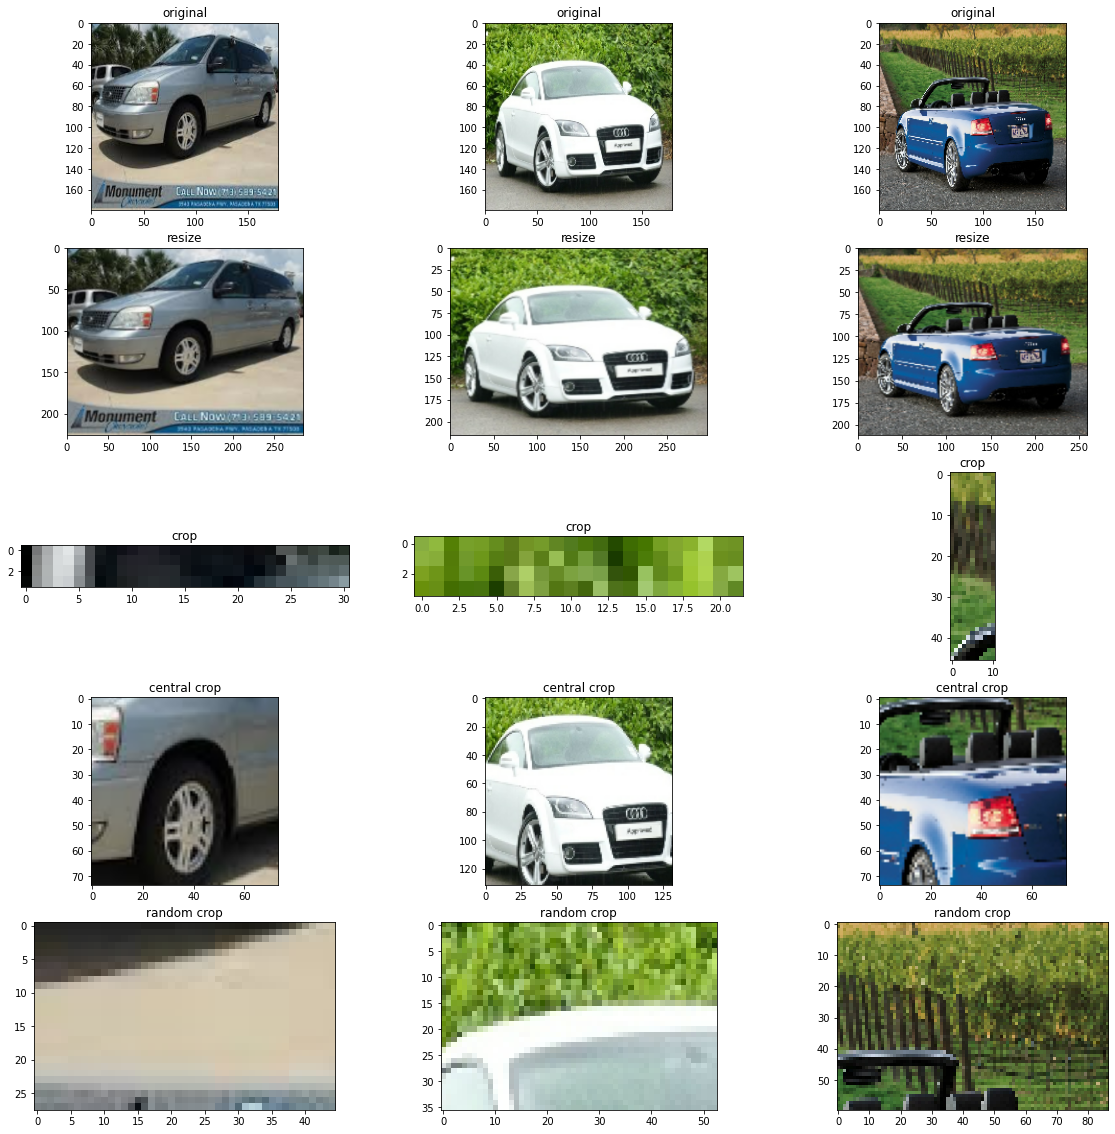

In [ ]:

fig, ax = plt.subplots(5, 3, figsize=(20,20))
for images, labels in train_ds.take(1):
    for i in range(3):
        # original
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # resize
        h = int(256 * tf.random.uniform([], minval=0.8, maxval=1.2))
        w = int(256 * tf.random.uniform([], minval=0.8, maxval=1.2))
        ax[1][i].imshow(tf.image.resize(images[i], [h,w]).numpy().astype("uint8"))
        ax[1][i].set_title("resize")
        # crop
        y, x, h, w = (50 * tf.random.uniform((4,))).numpy().astype("uint8")
        ax[2][i].imshow(tf.image.crop_to_bounding_box(images[i], y, x, h, w).numpy().astype("uint8"))
        ax[2][i].set_title("crop")
        # central crop
        x = tf.random.uniform([], minval=0.4, maxval=1.0)
        ax[3][i].imshow(tf.image.central_crop(images[i], x).numpy().astype("uint8"))
        ax[3][i].set_title("central crop")
        # crop to (h,w) at random offset
        h, w = (100 * tf.random.uniform((2,))).numpy().astype("uint8")
        seed = tf.random.uniform((2,), minval=0, maxval=6553).numpy().astype("int32")
        ax[4][i].imshow(tf.image.stateless_random_crop(images[i], [h,w,3], seed).numpy().astype("uint8"))
        ax[4][i].set_title("random crop")
plt.show()

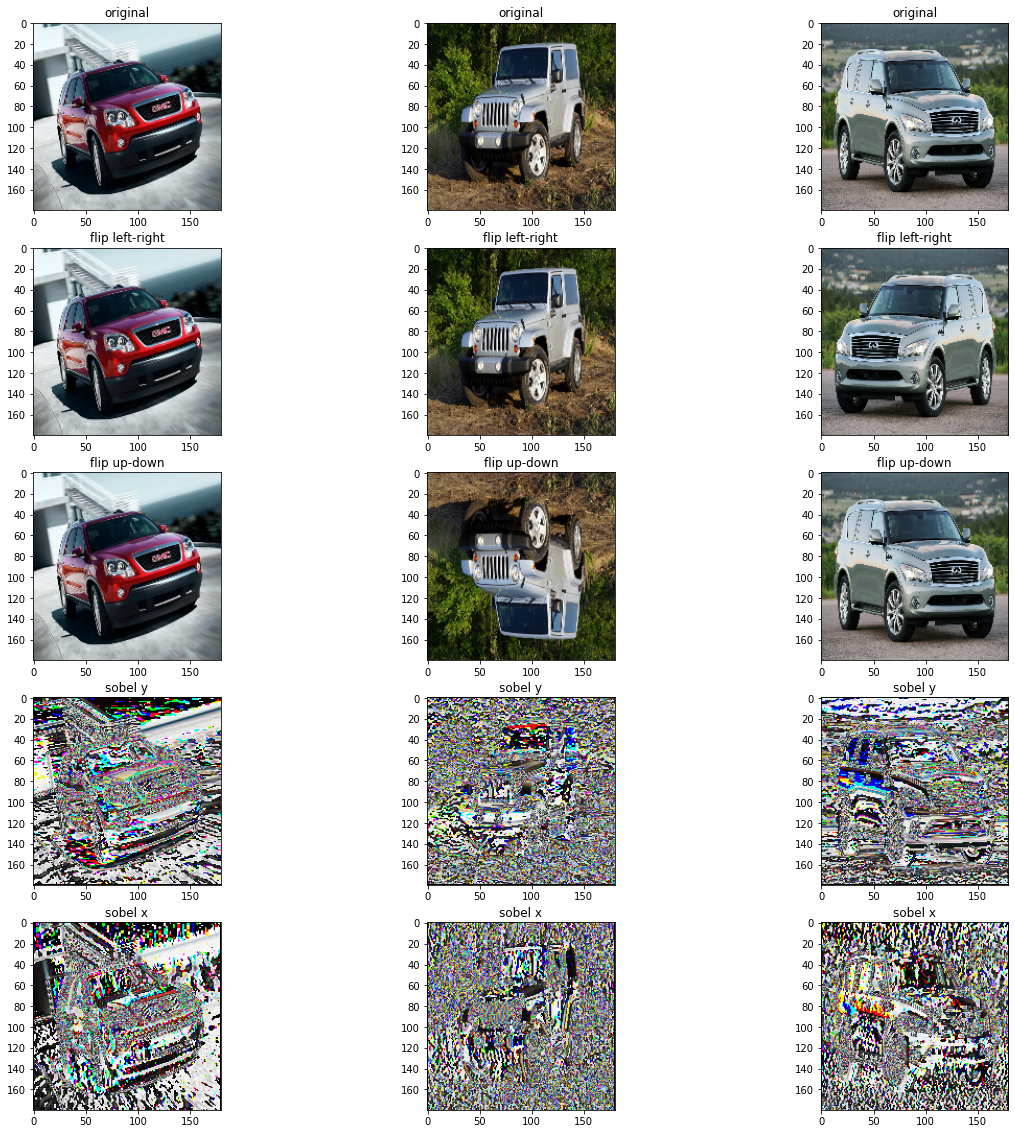

In [ ]:

fig, ax = plt.subplots(5, 3, figsize=(20,20))
for images, labels in train_ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # flip
        seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
        ax[1][i].imshow(tf.image.stateless_random_flip_left_right(images[i], seed).numpy().astype("uint8"))
        ax[1][i].set_title("flip left-right")
        # flip
        seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
        ax[2][i].imshow(tf.image.stateless_random_flip_up_down(images[i], seed).numpy().astype("uint8"))
        ax[2][i].set_title("flip up-down")
        # sobel edge
        sobel = tf.image.sobel_edges(images[i:i+1])
        ax[3][i].imshow(sobel[0, ..., 0].numpy().astype("uint8"))
        ax[3][i].set_title("sobel y")
        # sobel edge
        ax[4][i].imshow(sobel[0, ..., 1].numpy().astype("uint8"))
        ax[4][i].set_title("sobel x")
plt.show()

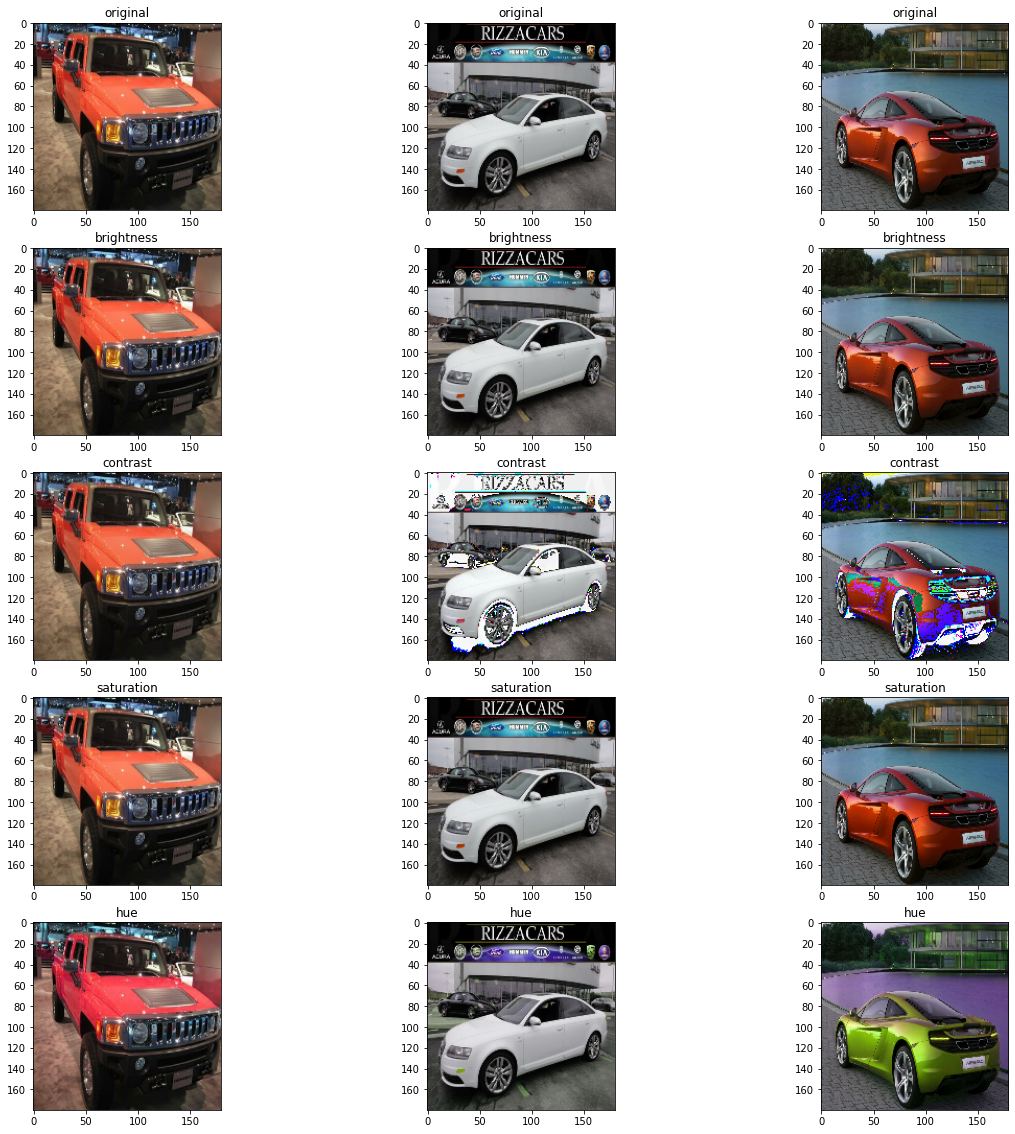

In [ ]:
fig, ax = plt.subplots(5, 3, figsize=(20,20))
for images, labels in train_ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        # brightness
        seed = tf.random.uniform((2,), minval=0, maxval=65536).numpy().astype("int32")
        ax[1][i].imshow(tf.image.stateless_random_brightness(images[i], 0.3, seed).numpy().astype("uint8"))
        ax[1][i].set_title("brightness")
        # contrast
        ax[2][i].imshow(tf.image.stateless_random_contrast(images[i], 0.7, 1.3, seed).numpy().astype("uint8"))
        ax[2][i].set_title("contrast")
        # saturation
        ax[3][i].imshow(tf.image.stateless_random_saturation(images[i], 0.7, 1.3, seed).numpy().astype("uint8"))
        ax[3][i].set_title("saturation")
        # hue
        ax[4][i].imshow(tf.image.stateless_random_hue(images[i], 0.3, seed).numpy().astype("uint8"))
        ax[4][i].set_title("hue")
plt.show()